<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Airborne_activity_Mazyr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for JER/Airborne activity_Mazyr_2013_2018.csv', parse_dates = ['Date'])
df.columns = ['Date', 'Conc']
df

,Date,Conc
0,2013-01-01,13.0
1,2013-01-02,5.0
2,2013-01-03,11.0
3,2013-01-04,13.0
4,2013-01-05,16.0
...,...,...
2186,2018-12-27,16.0
2187,2018-12-28,11.0
2188,2018-12-29,6.0
2189,2018-12-30,24.0


In [5]:
df.describe()

,Conc
count,2160.000000
mean,21.423611
std,13.638545
min,3.000000
25%,12.000000
50%,18.000000
75%,26.000000
max,115.000000


In [6]:
df = df.resample('W', on = 'Date').mean()
df

,Conc
Date,
2013-01-06,10.666667
2013-01-13,17.714286
2013-01-20,14.857143
2013-01-27,28.000000
2013-02-03,14.714286
...,...
2018-12-09,16.857143
2018-12-16,22.142857
2018-12-23,15.571429


In [7]:
#OK result = df03.iloc[:, 1].div(df03.Conc.mean(), axis = 0)
df.reset_index(inplace = True)
df['Week'] = df.Date.dt.isocalendar().week
df['Year'] = df.Date.dt.year
df

,Date,Conc,Week,Year
0,2013-01-06,10.666667,1,2013
1,2013-01-13,17.714286,2,2013
2,2013-01-20,14.857143,3,2013
3,2013-01-27,28.000000,4,2013
4,2013-02-03,14.714286,5,2013
...,...,...,...,...
309,2018-12-09,16.857143,49,2018
310,2018-12-16,22.142857,50,2018
311,2018-12-23,15.571429,51,2018
312,2018-12-30,13.285714,52,2018


In [10]:
df13 = df[df['Year'] == 2013]
df13

,Date,Conc,Week,Year
0,2013-01-06,10.666667,1,2013
1,2013-01-13,17.714286,2,2013
2,2013-01-20,14.857143,3,2013
3,2013-01-27,28.000000,4,2013
4,2013-02-03,14.714286,5,2013
5,2013-02-10,11.571429,6,2013
6,2013-02-17,23.000000,7,2013
7,2013-02-24,27.285714,8,2013
8,2013-03-03,12.285714,9,2013
9,2013-03-10,20.428571,10,2013


In [ ]:
#df_uni = df03.append(df04, sort = False)

In [11]:
#write function for calculating w_i
def wi_calc(my_df, year):
    df_x = my_df[my_df['Year'] == year].dropna()
    result = df_x.iloc[:, 1].div(df_x.Conc.mean(), axis = 0)
    return result

df13['w_i'] = wi_calc(df, 2013)
df13

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Date,Conc,Week,Year,w_i
0,2013-01-06,10.666667,1,2013,0.567468
1,2013-01-13,17.714286,2,2013,0.942403
2,2013-01-20,14.857143,3,2013,0.790403
3,2013-01-27,28.000000,4,2013,1.489605
4,2013-02-03,14.714286,5,2013,0.782803
5,2013-02-10,11.571429,6,2013,0.615602
6,2013-02-17,23.000000,7,2013,1.223604
7,2013-02-24,27.285714,8,2013,1.451605
8,2013-03-03,12.285714,9,2013,0.653602
9,2013-03-10,20.428571,10,2013,1.086803


In [12]:
df14 = df[df['Year'] == 2014]

In [13]:
df14['w_i'] = wi_calc(df, 2014)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df14.dropna()

,Date,Conc,Week,Year,w_i
52,2014-01-05,14.857143,1,2014,0.668480
53,2014-01-12,13.428571,2,2014,0.604203
54,2014-01-19,12.714286,3,2014,0.572064
55,2014-01-26,12.857143,4,2014,0.578492
56,2014-02-02,14.000000,5,2014,0.629913
57,2014-02-09,14.714286,6,2014,0.662052
58,2014-02-16,16.142857,7,2014,0.726329
59,2014-02-23,16.428571,8,2014,0.739184
60,2014-03-02,28.857143,9,2014,1.298393
61,2014-03-09,22.000000,10,2014,0.989864


In [16]:
df15 = df[df['Year'] == 2015].dropna()

In [17]:
df15['w_i'] = wi_calc(df, 2015)
df15

,Date,Conc,Week,Year,w_i
104,2015-01-04,22.000000,1,2015,0.854202
105,2015-01-11,30.571429,2,2015,1.187008
106,2015-01-18,36.571429,3,2015,1.419972
107,2015-01-25,28.857143,4,2015,1.120447
108,2015-02-01,18.142857,5,2015,0.704439
109,2015-02-08,20.857143,6,2015,0.809828
110,2015-02-15,22.857143,7,2015,0.887482
111,2015-02-22,21.571429,8,2015,0.837562
112,2015-03-01,27.714286,9,2015,1.076072
113,2015-03-08,22.000000,10,2015,0.854202


In [18]:
df16 = df[df['Year'] == 2016].dropna()

In [19]:
df16['w_i'] = wi_calc(df, 2016)
df16

,Date,Conc,Week,Year,w_i
156,2016-01-03,27.714286,53,2016,1.105383
157,2016-01-10,34.000000,1,2016,1.356088
158,2016-01-17,21.857143,2,2016,0.871771
159,2016-01-24,28.000000,3,2016,1.116779
160,2016-01-31,22.714286,4,2016,0.905958
161,2016-02-07,35.428571,5,2016,1.413067
162,2016-02-14,23.285714,6,2016,0.928749
163,2016-02-21,20.000000,7,2016,0.797699
164,2016-02-28,22.428571,8,2016,0.894562
165,2016-03-06,16.571429,9,2016,0.660951


In [20]:
df17 = df[df['Year'] == 2017].dropna()
df17['w_i'] = wi_calc(df, 2017)
df17

,Date,Conc,Week,Year,w_i
208,2017-01-01,23.857143,52,2017,1.470632
209,2017-01-08,12.000000,1,2017,0.739719
210,2017-01-15,9.857143,2,2017,0.607626
211,2017-01-22,15.428571,3,2017,0.951068
212,2017-01-29,13.857143,4,2017,0.854200
213,2017-02-05,12.857143,5,2017,0.792556
214,2017-02-12,15.714286,6,2017,0.968680
215,2017-02-19,25.142857,7,2017,1.549888
216,2017-02-26,10.142857,8,2017,0.625239
217,2017-03-05,32.142857,9,2017,1.981391


In [21]:
df18 = df[df['Year'] == 2018].dropna()
df18['w_i'] = wi_calc(df, 2018)
df18

,Date,Conc,Week,Year,w_i
261,2018-01-07,9.571429,1,2018,0.470366
262,2018-01-14,16.000000,2,2018,0.786283
263,2018-01-21,17.428571,3,2018,0.856487
264,2018-01-28,33.857143,4,2018,1.663832
265,2018-02-04,29.428571,5,2018,1.446200
266,2018-02-11,28.428571,6,2018,1.397057
267,2018-02-18,40.857143,7,2018,2.007830
268,2018-02-25,18.571429,8,2018,0.912650
269,2018-03-04,16.428571,9,2018,0.807344
270,2018-03-11,31.285714,10,2018,1.537465


In [22]:
df_uni = df13.append(df14, sort = False)
df_uni

,Date,Conc,Week,Year,w_i
0,2013-01-06,10.666667,1,2013,0.567468
1,2013-01-13,17.714286,2,2013,0.942403
2,2013-01-20,14.857143,3,2013,0.790403
3,2013-01-27,28.000000,4,2013,1.489605
4,2013-02-03,14.714286,5,2013,0.782803
...,...,...,...,...,...
99,2014-11-30,46.000000,48,2014,2.069716
100,2014-12-07,23.714286,49,2014,1.066996
101,2014-12-14,32.428571,50,2014,1.459085
102,2014-12-21,11.000000,51,2014,0.494932


In [23]:
df_uni1 = df_uni.append(df15, sort = False)
df_uni2 = df_uni1.append(df16, sort = False)
df_uni3 = df_uni2.append(df17, sort = False)
df_uni4 = df_uni3.append(df18, sort = False)
df_uni4

,Date,Conc,Week,Year,w_i
0,2013-01-06,10.666667,1,2013,0.567468
1,2013-01-13,17.714286,2,2013,0.942403
2,2013-01-20,14.857143,3,2013,0.790403
3,2013-01-27,28.000000,4,2013,1.489605
4,2013-02-03,14.714286,5,2013,0.782803
...,...,...,...,...,...
308,2018-12-02,16.285714,48,2018,0.800324
309,2018-12-09,16.857143,49,2018,0.828406
310,2018-12-16,22.142857,50,2018,1.088160
311,2018-12-23,15.571429,51,2018,0.765222


In [24]:
df_final=df_uni4.drop(columns = ['Week', 'Year'])
df_final

,Date,Conc,w_i
0,2013-01-06,10.666667,0.567468
1,2013-01-13,17.714286,0.942403
2,2013-01-20,14.857143,0.790403
3,2013-01-27,28.000000,1.489605
4,2013-02-03,14.714286,0.782803
...,...,...,...
308,2018-12-02,16.285714,0.800324
309,2018-12-09,16.857143,0.828406
310,2018-12-16,22.142857,1.088160
311,2018-12-23,15.571429,0.765222


In [25]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/Data for JER/Weekly_index13-18_Mazyr.csv', index = False)

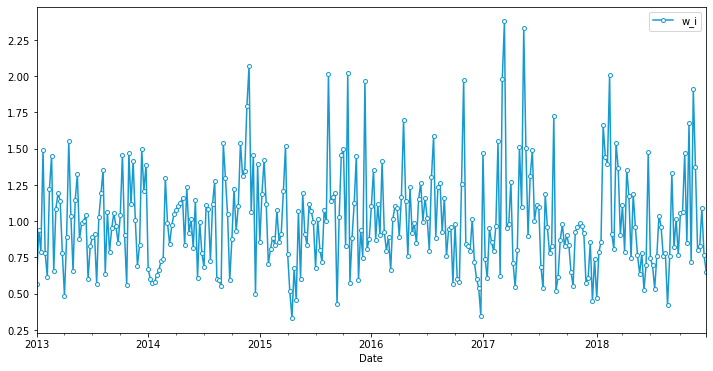

In [26]:
df_final.plot('Date',
              'w_i',
              figsize=(12,6),
              marker = 'o',
              markersize = 4,
              mfc = 'white',        
              color = '#169acf')

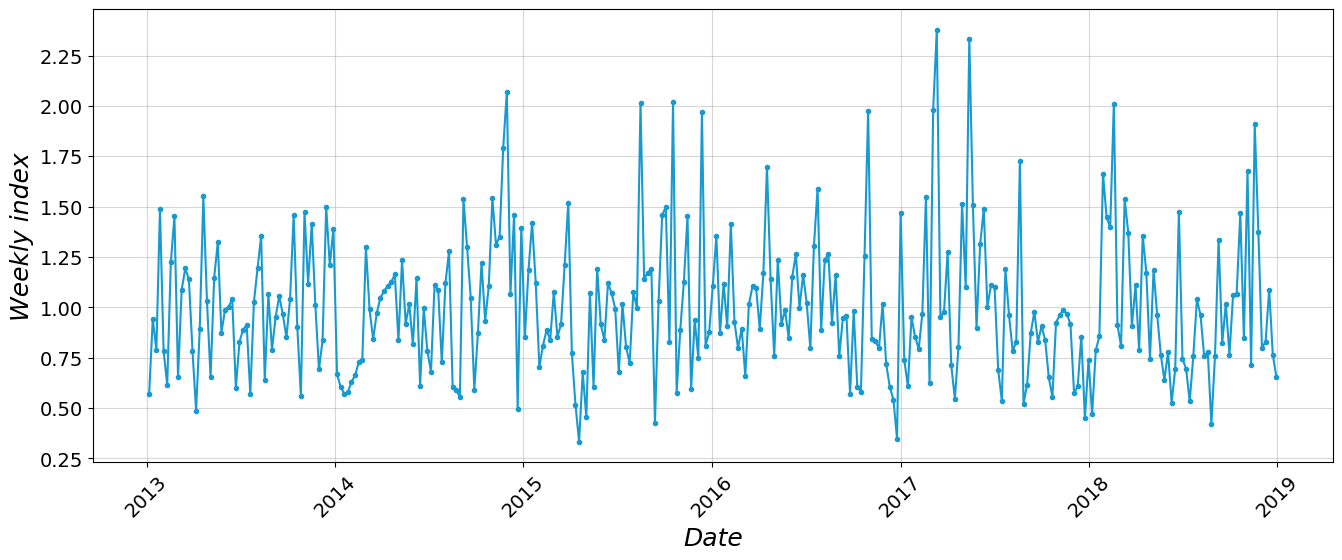

<Figure size 432x288 with 0 Axes>

In [27]:
x = df_final['Date']
y = df_final['w_i']
dates = df_final.Date.dt.year

fig = plt.figure(figsize = (16, 6), dpi = 100)
ax = fig.add_axes()
plt.plot(x, y, marker = 'o',
         markersize = 3,
         #label = 'Weekly index',
         color = '#169acf')
plt.xlabel('Date', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.ylabel('Weekly index', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.5)
#plt.legend(loc = 'upper right')
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig6.png',dpi = 300)

# **Holt-Winters model**

In [ ]:
df_final.set_index('Date', inplace=True)
df_final.head()

#decompose_result = 

,Conc,w_i
Date,,
2003-01-05,26.200000,1.837894
2003-01-12,34.428571,2.415117
2003-01-19,9.428571,0.661401
2003-01-26,16.142857,1.132399
2003-02-02,6.833333,0.479349


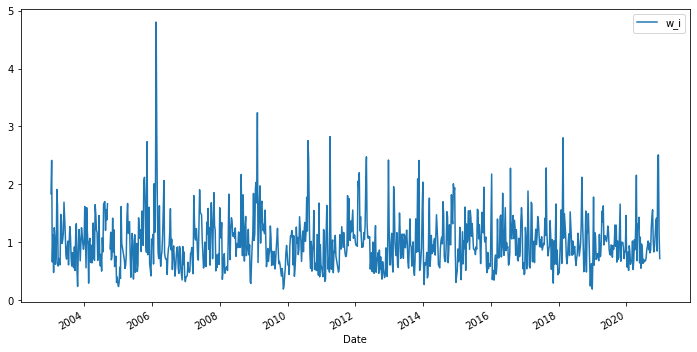

In [ ]:
df_final[['w_i']].plot(figsize = (12,6))

In [ ]:
decompose_result = seasonal_decompose(df_final['w_i'], model='multiplicative')
decompose_result.plot()

ValueError: ignored